# Group Presentation 1 

## Data Analysis, Mathematics, Algorithms and Modeling

Dataset: Heart Failure (CVD - Cardiovascular Diseases) Prediction

Link to Dataset: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data

Description: Dataset from Davide Chicco, Giuseppe Jurman:Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

This data exploration investigates patient health features to understand heart failure risks. Through visualization and summary statistics, we identify trends, correlations, and outliers in variables such as age, anaemia, creatinine phosphokinase levels and more. These insights help guide data preprocessing and predictive modeling in future stages of analysis.


Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from tabulate import tabulate


Load the dataset into a dataframe

In [2]:
df = pd.read_csv('heartData.csv')

print("Dataset Preview (First 5 Rows):")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))
print("----------*----------*----------*----------")


print("Dataset Info:")
info_df = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum().values,
    'Dtype': df.dtypes.astype(str).values
})
print(tabulate(info_df, headers='keys', tablefmt='fancy_grid'))
print("----------*----------*----------*----------")


print("Dataset Description:")
description = df.describe().transpose().round(3)
print(tabulate(description, headers='keys', tablefmt='fancy_grid'))
print("----------*----------*----------*----------")  


Dataset Preview (First 5 Rows):
╒════╤═══════╤═══════════╤════════════════════════════╤════════════╤═════════════════════╤═══════════════════════╤═════════════╤════════════════════╤════════════════╤═══════╤═══════════╤════════╤═══════════════╕
│    │   age │   anaemia │   creatinine_phosphokinase │   diabetes │   ejection_fraction │   high_blood_pressure │   platelets │   serum_creatinine │   serum_sodium │   sex │   smoking │   time │   DEATH_EVENT │
╞════╪═══════╪═══════════╪════════════════════════════╪════════════╪═════════════════════╪═══════════════════════╪═════════════╪════════════════════╪════════════════╪═══════╪═══════════╪════════╪═══════════════╡
│  0 │    75 │         0 │                        582 │          0 │                  20 │                     1 │      265000 │                1.9 │            130 │     1 │         0 │      4 │             1 │
├────┼───────┼───────────┼────────────────────────────┼────────────┼─────────────────────┼───────────────────────┼──────

Load the data (by using functions)

In [3]:
def loadData(file):
    return pd.read_csv(file)
    
    
def displayHead(df, n=5):
    print("Dataset Preview:")
    print(tabulate(df.head(n), headers='keys', tablefmt='grid'))

def displayInfo(df):
    print("Dataset Info:")
    info_df = pd.DataFrame({
        'Column': df.columns,
        'Non-Null Count': df.count().values,
        'Dtype': df.dtypes.values
    })
    print(tabulate(info_df, headers='keys', tablefmt='grid'))

def displayDescription(df):
    print("Descriptive Statistics:")
    description = df.describe().transpose()
    print(tabulate(description, headers='keys', tablefmt='grid'))

In [4]:
df1 = loadData('heartData.csv')
displayHead(df1)
print("----------*----------*----------*----------")
displayInfo(df1)
print("----------*----------*----------*----------")
displayDescription(df1)

Dataset Preview:
+----+-------+-----------+----------------------------+------------+---------------------+-----------------------+-------------+--------------------+----------------+-------+-----------+--------+---------------+
|    |   age |   anaemia |   creatinine_phosphokinase |   diabetes |   ejection_fraction |   high_blood_pressure |   platelets |   serum_creatinine |   serum_sodium |   sex |   smoking |   time |   DEATH_EVENT |
+====+=======+===========+============================+============+=====================+=======================+=============+====================+================+=======+===========+========+===============+
|  0 |    75 |         0 |                        582 |          0 |                  20 |                     1 |      265000 |                1.9 |            130 |     1 |         0 |      4 |             1 |
+----+-------+-----------+----------------------------+------------+---------------------+-----------------------+-------------+-------

Load the data (by using classes and methods)

In [5]:
class HeartDataAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def display_head(self, n=5):
        print("Dataset Preview:")
        print(tabulate(self.df.head(n), headers='keys', tablefmt='grid'))

    def display_info(self):
        print("Dataset Info:")
        info_df = pd.DataFrame({
            'Column': self.df.columns,
            'Non-Null Count': self.df.count().values,
            'Dtype': self.df.dtypes.values
        })
        print(tabulate(info_df, headers='keys', tablefmt='grid'))

    def display_description(self):
        print("Descriptive Statistics:")
        description = self.df.describe().transpose()
        print(tabulate(description, headers='keys', tablefmt='grid'))

In [6]:
analyzer = HeartDataAnalyzer('heartData.csv')
analyzer.display_head()
print("----------*----------*----------*----------")
analyzer.display_info()
print("----------*----------*----------*----------")
analyzer.display_description()


Dataset Preview:
+----+-------+-----------+----------------------------+------------+---------------------+-----------------------+-------------+--------------------+----------------+-------+-----------+--------+---------------+
|    |   age |   anaemia |   creatinine_phosphokinase |   diabetes |   ejection_fraction |   high_blood_pressure |   platelets |   serum_creatinine |   serum_sodium |   sex |   smoking |   time |   DEATH_EVENT |
+====+=======+===========+============================+============+=====================+=======================+=============+====================+================+=======+===========+========+===============+
|  0 |    75 |         0 |                        582 |          0 |                  20 |                     1 |      265000 |                1.9 |            130 |     1 |         0 |      4 |             1 |
+----+-------+-----------+----------------------------+------------+---------------------+-----------------------+-------------+-------

Calculating Variance, Standard Deviation, and Quartiles (for the heartData.csv dataset) for every feature

In [7]:
meaningfulColumns = [
    'age', 'creatinine_phosphokinase', 'ejection_fraction', 
    'platelets', 'serum_creatinine', 'serum_sodium', 'time'
]


meaningfulVariance = df[meaningfulColumns].var()
print("Variance:")
print(tabulate(meaningfulVariance.reset_index(), headers=['Feature', 'Variance'], tablefmt='grid'))
print("----------*----------*----------*----------")


meaningfulSTD = df[meaningfulColumns].std()
print("Standard Deviation:")
print(tabulate(meaningfulSTD.reset_index(), headers=['Feature', 'Std Dev'], tablefmt='grid'))
print("----------*----------*----------*----------")


meaningfulQuartiles = df[meaningfulColumns].quantile([0.25, 0.5, 0.75])
print("Quartiles (Q1, Median, Q3):")
print(tabulate(meaningfulQuartiles.transpose(), headers='keys', tablefmt='grid'))
print("----------*----------*----------*----------")

Variance:
+----+--------------------------+------------------+
|    | Feature                  |         Variance |
+====+==========================+==================+
|  0 | age                      |    141.486       |
+----+--------------------------+------------------+
|  1 | creatinine_phosphokinase | 941459           |
+----+--------------------------+------------------+
|  2 | ejection_fraction        |    140.063       |
+----+--------------------------+------------------+
|  3 | platelets                |      9.56567e+09 |
+----+--------------------------+------------------+
|  4 | serum_creatinine         |      1.07021     |
+----+--------------------------+------------------+
|  5 | serum_sodium             |     19.47        |
+----+--------------------------+------------------+
|  6 | time                     |   6023.97        |
+----+--------------------------+------------------+
----------*----------*----------*----------
Standard Deviation:
+----+-------------------

Displaying the graph of quartiles for every feature (some of the features are excluded because they are booleans, meaning they can only take a value 0 or 1)

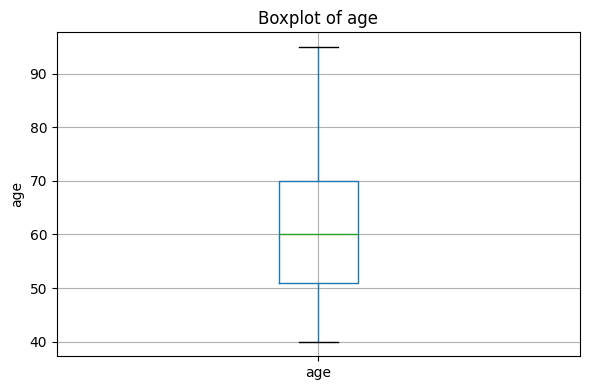

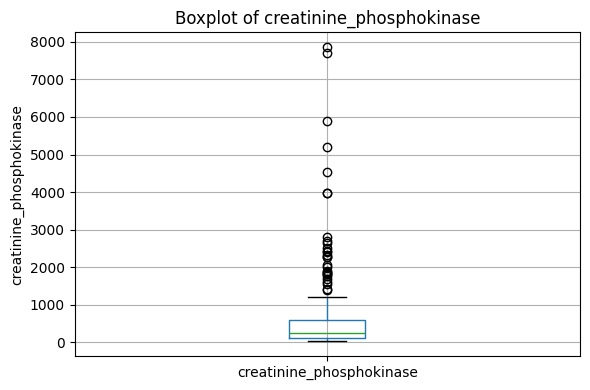

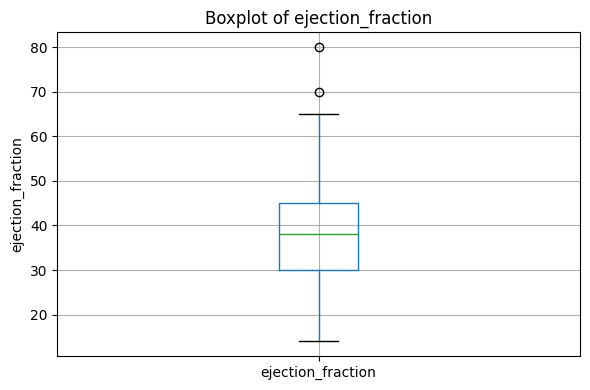

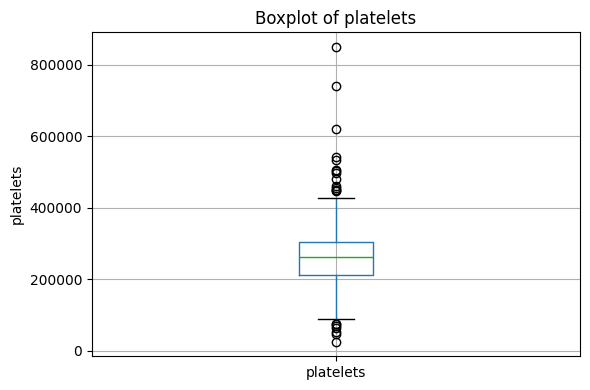

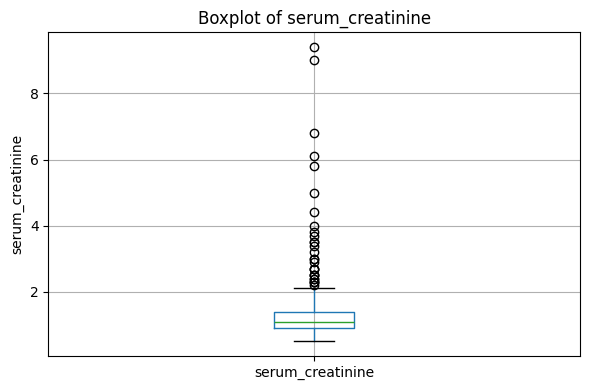

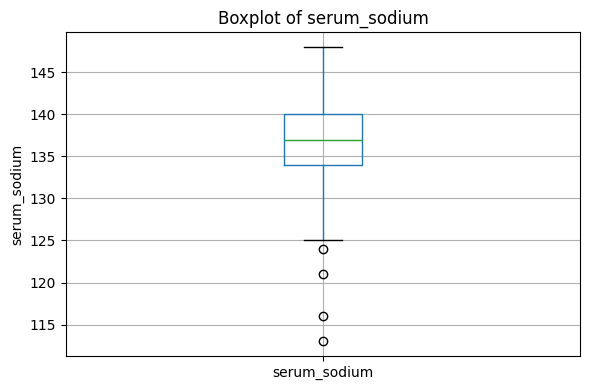

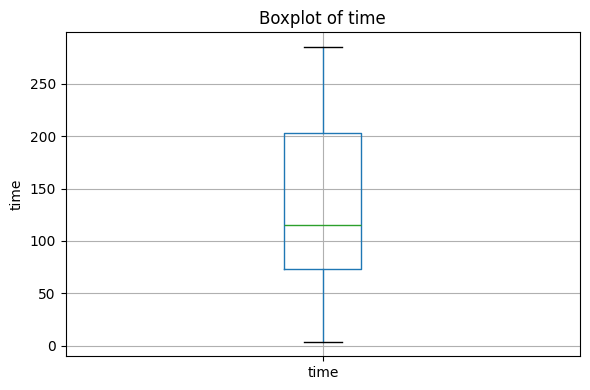

In [8]:
features = [
    'age', 'creatinine_phosphokinase',
    'ejection_fraction', 'platelets',
    'serum_creatinine', 'serum_sodium',
    'time'
]

for feature in features:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Summary

- **Scatter Plot:** Shows correlation between Age and Death Event.
- **Histogram:** Shows distribution of Serum Creatinine Levels.
- **Box - Whisker Plot:** Detects outliers and spread across multiple features.
- **Venn Diagram:** Overlap between high-age and high ejection fraction in patients.
- **Numerical Summary:** Quick stats like mean, median, mode, and range help understand the dataset's shape and variability.

**P.S. The numerical summary of the dataset is done in the beginning of this Jupyter Notebook. More precisely, at the cell where the dataset is loaded into the dataframe (not redone down below due to redundancy).**


1. Scatter Plot

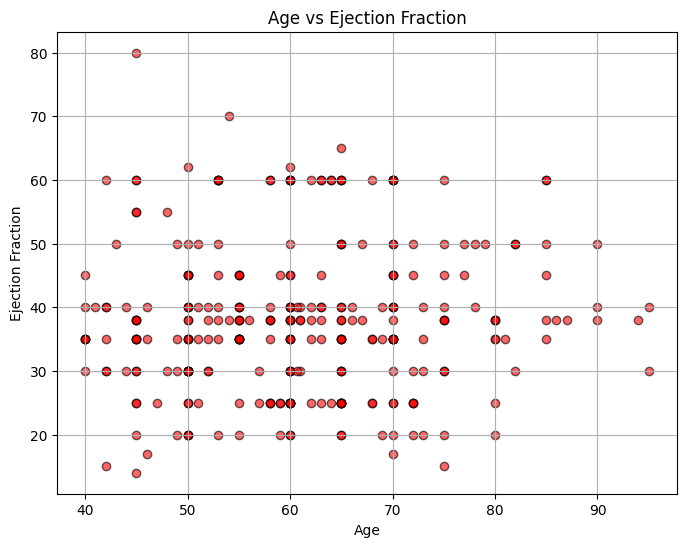

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['ejection_fraction'], alpha=0.6, c='red', edgecolors='k')
plt.title('Age vs Ejection Fraction')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.grid(True)
plt.show()

2. Histogram

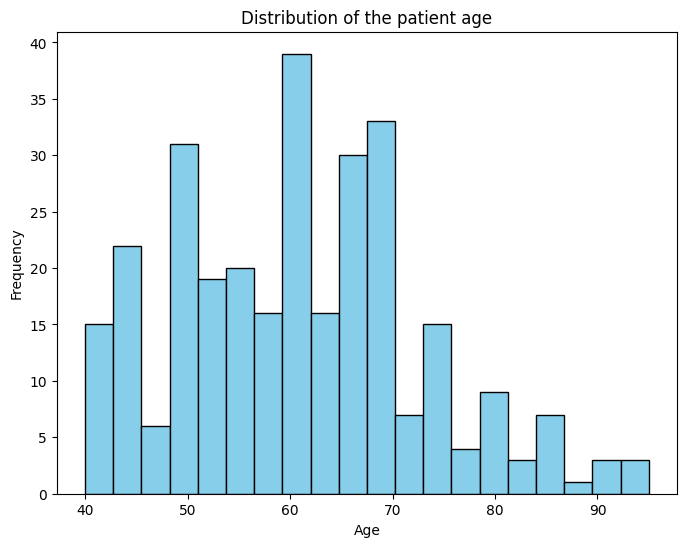

In [10]:
plt.figure(figsize=(8, 6))
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of the patient age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


3. Box & Whisker Plot (Multiple Variables)

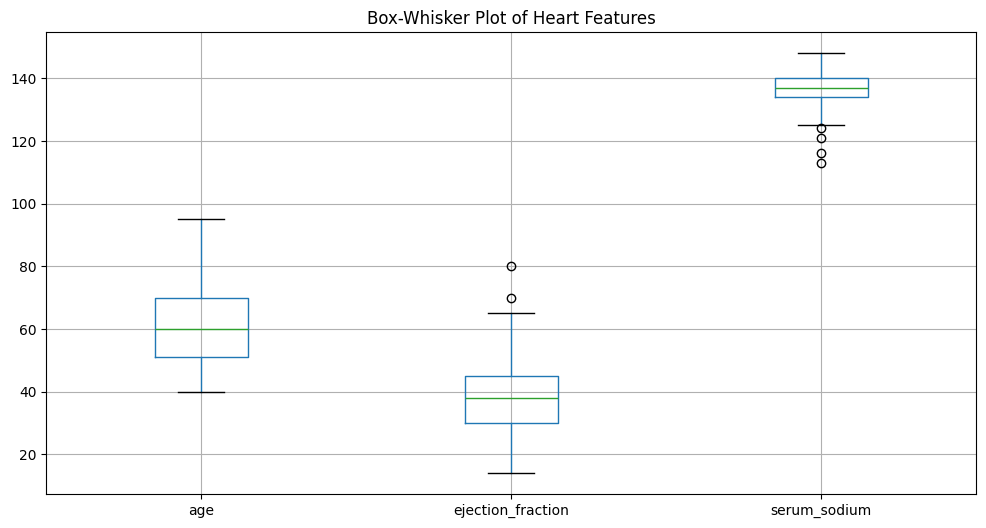

In [11]:
plt.figure(figsize=(12, 6))
df[['age', 'ejection_fraction', 'serum_sodium']].boxplot()
plt.title('Box-Whisker Plot of Heart Features')
plt.grid(True)
plt.show()


 4. Venn Diagram

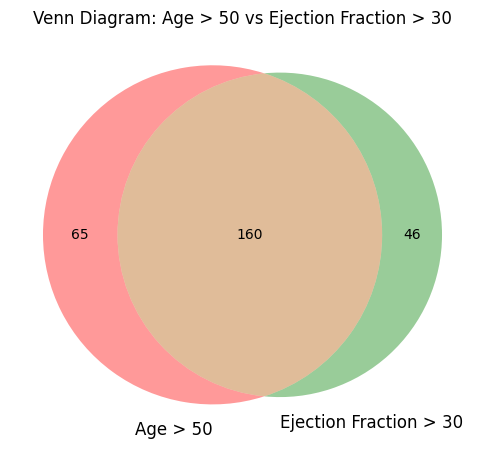

In [12]:

set1 = set(df[df['age'] > 50].index)
set2 = set(df[df['ejection_fraction'] > 30].index)

plt.figure(figsize=(6, 6))
venn2([set1, set2], set_labels=('Age > 50', 'Ejection Fraction > 30'))
plt.title('Venn Diagram: Age > 50 vs Ejection Fraction > 30')
plt.show()


## Challenge #5 (done in the end because all the other challenges were related to each - other except this one)

Dataset: Formula 1 Standings - Drivers

Link: https://www.kaggle.com/code/stpeteishii/formula1-standings-bar-chart-race?select=DriversStandings.csv

Description: This dataset shows the Formula 1 driver standings, including each driver's position, race time, team, year, and total points. It gives a clear picture of how drivers performed during the season, which teams were strongest, and how the competition progressed throughout the year in the world of F1 racing.

In [13]:
df_f1 = pd.read_csv('DriversStandings.csv')

print("Dataset Preview (First 5 Rows):")
print(tabulate(df_f1.head(), headers='keys', tablefmt='fancy_grid'))
print("----------*----------*----------*----------")


print("Dataset Info:")
info_df = pd.DataFrame({
    'Column': df_f1.columns,
    'Non-Null Count': df_f1.notnull().sum().values,
    'Dtype': df_f1.dtypes.astype(str).values
})
print(tabulate(info_df, headers='keys', tablefmt='fancy_grid'))
print("----------*----------*----------*----------")


print("Descriptive Statistics:")
description = df_f1.describe().transpose().round(3)
print(tabulate(description, headers='keys', tablefmt='fancy_grid'))
print("----------*----------*----------*----------")  


Dataset Preview (First 5 Rows):
╒════╤══════════════╤═══════╤════════════════════════╤═══════════════╤═════════════╤═══════╤════════╕
│    │   Unnamed: 0 │   Pos │ Driver                 │ Nationality   │ Car         │   PTS │   Year │
╞════╪══════════════╪═══════╪════════════════════════╪═══════════════╪═════════════╪═══════╪════════╡
│  0 │            0 │     1 │ Nino Farina FAR        │ ITA           │ Alfa Romeo  │    30 │   1950 │
├────┼──────────────┼───────┼────────────────────────┼───────────────┼─────────────┼───────┼────────┤
│  1 │            1 │     2 │ Juan Manuel Fangio FAN │ ARG           │ Alfa Romeo  │    27 │   1950 │
├────┼──────────────┼───────┼────────────────────────┼───────────────┼─────────────┼───────┼────────┤
│  2 │            2 │     3 │ Luigi Fagioli FAG      │ ITA           │ Alfa Romeo  │    24 │   1950 │
├────┼──────────────┼───────┼────────────────────────┼───────────────┼─────────────┼───────┼────────┤
│  3 │            3 │     4 │ Louis Rosier ROS    

Finding the mean, median and the mode for the points accumulated during each driver's race.

In [14]:
mean_points = df_f1['PTS'].mean()


median_points = df_f1['PTS'].median()


mode_points = df_f1['PTS'].mode()[0]


print("Mean points:", mean_points)
print("Median points:", median_points)
print("Mode points:", mode_points)

Mean points: 27.207883026064845
Median points: 8.0
Mode points: 0.0


Finding the mean, median and the mode for the position of each driver.

Firstly, since the position is of a NaN (string) datatype, we have to convert it to integer (int).

In [15]:
df_f1 = df_f1[df_f1['Pos'].str.fullmatch(r'\d+')]

df_f1['Pos'] = df_f1['Pos'].astype(int)


In [16]:
mean_position = round(df_f1['Pos'].mean())

median_position = df_f1['Pos'].median()


mode_position = df_f1['Pos'].mode()[0]


print("Mean position:", mean_position )
print("Median position:", median_position)
print("Mode position:", mode_position)

Mean position: 11
Median position: 11.0
Mode position: 18
